C:\Users\xuans\AppData\Local\Temp\ipykernel_2284\3854402428.py:5: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  return np.math.comb(n, k)


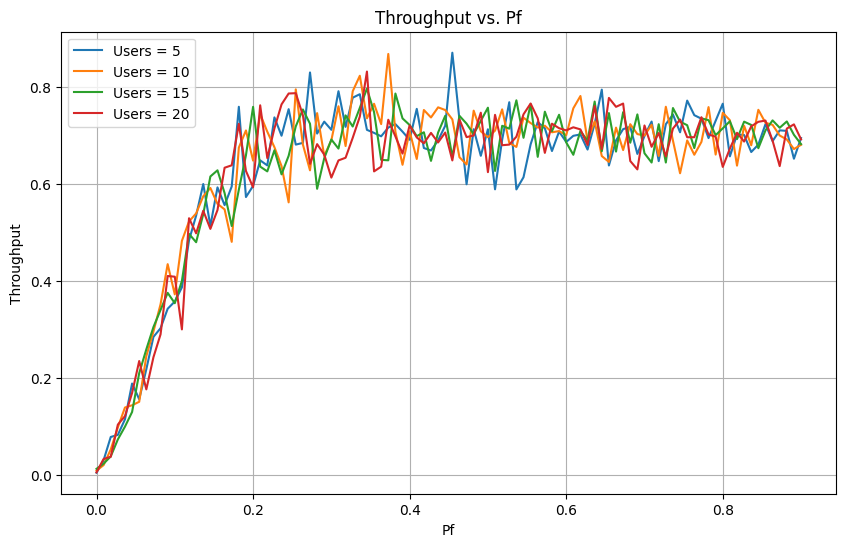

In [14]:
import numpy as np
import matplotlib.pyplot as plt

def binomial_coefficient(n, k):
    return np.math.comb(n, k)

def Pr(i, N, pr):
    binomial_coefficient_value = binomial_coefficient(N, i)
    term1 = (1 - pr) ** (N - i)
    term2 = pr ** i
    probability = binomial_coefficient_value * term1 * term2
    return probability

def Pf(i, N, M, pf):
    binomial_coefficient_value = binomial_coefficient(M - N, i)
    term1 = (1 - pf) ** (M - N - i)
    term2 = pf ** i
    probability = binomial_coefficient_value * term1 * term2
    return probability

def Pts(N, M, pf, pr):
    Pf_1_N = Pf(1, N, M, pf)
    Pr_0_N = Pr(0, N, pr)
    Pf_0_N = Pf(0, N, M, pf)
    Pr_1_N = Pr(1, N, pr)
    probability = Pf_1_N * Pr_0_N + Pf_0_N * Pr_1_N
    return probability

def Pps(N, M, pf, pr):
    Pf_2_N = Pf(2, N, M, pf)
    Pf_1_N = Pf(1, N, M, pf)
    Pr_0_N = Pr(0, N, pr)
    Pf_0_N = Pf(0, N, M, pf)
    Pr_2_N = Pr(2, N, pr)
    Pr_1_N = Pr(1, N, pr)
    probability = Pf_2_N * Pr_0_N + Pf_0_N * Pr_2_N + Pf_1_N * Pr_1_N
    return probability

def calculate_pi_n(matrix, M, pf):
    pi_n = np.zeros(M + 1)

    for N in range(M + 1):
        pi_n[N] = np.sum(matrix[N]/M)

    return pi_n

def calculate_throughput(matrix, M, pf, pr):
    A = matrix.shape[1]  # Số slot
    throughput = 0.0

    for N in range(M + 1):
        pi_n = calculate_pi_n(matrix, M, pf)[N]  # Tính xác suất pi_n cho N gói
        pts = Pts(N, M, pf, pr)
        pps = Pps(N, M, pf, pr)

        throughput += pi_n * (pts + pps)

    return throughput

# Hàm đếm số lượng số 1 trong mỗi cột
def count_ones_per_column(matrix):
    return np.sum(matrix, axis=0)

# Kích thước ma trận
M = 20  # Số người dùng
e=0.2
A = int(M*(1+e)) # Số slot
pr =0.01
# Danh sách giá trị pf
pf_values = np.linspace(0, 0.9, 100)

# Đồ thị
plt.figure(figsize=(10, 6))

for user in [5, 10, 15, 20]:
    throughput_values = []
    for pf in pf_values:
        matrix = np.random.choice([0, 1], size=(M + 1, A), p=[1 - pf - pr, pf + pr])
        throughput = calculate_throughput(matrix, M, pf, pr)  # 0.1 là giá trị pr
        throughput_values.append(throughput/3.5)

    plt.plot(pf_values, throughput_values, label=f'Users = {user}')

plt.title('Throughput vs. Pf')
plt.xlabel('Pf')
plt.ylabel('Throughput')
plt.legend()
plt.grid(True)
plt.show()
